In this Lab, we will practice in Numpy, Pandas and simple linear regression. We will use the dataset mtcars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Use the dataset cars.csv 

In [2]:
cars_df = pd.read_csv(filepath_or_buffer='cars.csv')
cars_df.head()

,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1.Convert the column mpg to numpy array and print the array. (5)

In [3]:
#Enter your code here
mpg = np.array(cars_df['mpg'])
mpg

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

2. calculate how many cars' mpg is under 15. (5)

In [7]:
#Enter your code here
(mpg < 15).sum()

5

3.Show the models that their mpg is under 15. (10)

In [11]:
#Enter your code here
mpg_15 = cars_df[cars_df['mpg'] < 15]
mpg_15_models = mpg_15[['model', 'mpg']]
mpg_15_models

,model,mpg
6,Duster 360,14.3
14,Cadillac Fleetwood,10.4
15,Lincoln Continental,10.4
16,Chrysler Imperial,14.7
23,Camaro Z28,13.3


4.Show how many unique make does the dataset have and print them out. (10)

In [18]:
#Enter your code here
unique_makes = cars_df['make'].unique()
print(f'{len(unique_makes)} unique makes\n', unique_makes)

22 unique makes
 ['Mazda' 'Datsun' 'Hornet' 'Valiant' 'Duster' 'Merc' 'Cadillac' 'Lincoln'
 'Chrysler' 'Fiat' 'Honda' 'Toyota' 'Dodge' 'AMC' 'Camaro' 'Pontiac'
 'Porsche' 'Lotus' 'Ford' 'Ferrari' 'Maserati' 'Volvo']


5.Show how many cars each make has. (10)

In [26]:
#Enter your code here
num_cars_make = cars_df[['make', 'model']].groupby('make').size()
num_cars_make

make
AMC         1
Cadillac    1
Camaro      1
Chrysler    1
Datsun      1
Dodge       1
Duster      1
Ferrari     1
Fiat        2
Ford        1
Honda       1
Hornet      2
Lincoln     1
Lotus       1
Maserati    1
Mazda       2
Merc        7
Pontiac     1
Porsche     1
Toyota      2
Valiant     1
Volvo       1
dtype: int64

6.Creat the scatter plot with X axis is hp and Y axis is mpg.(10)

<Axes: xlabel='hp', ylabel='mpg'>

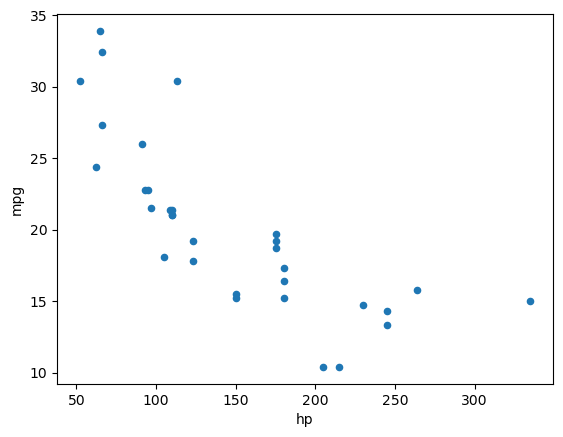

In [29]:
#Enter your code here
cars_df.plot(kind = 'scatter', x = 'hp', y = 'mpg')

7.Train the linear model using hp as variable and MPG as target and print $\theta_{0}$, $\theta_{1}$ (10) 

(hint: use the fomula: $\theta = (\mathrm{X}^{T}\mathrm{X})^{-1}\mathrm{X}^{T}\mathrm{y}$)

In [28]:
#Enter your code here
hp = cars_df['hp']
a = np.ones((hp.shape[0], 1))
X = np.hstack((a, hp.values.reshape(-1, 1)))
y = cars_df['mpg']

theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
theta

array([30.09886054, -0.06822828])

8.Plat the scatter plot again with the line showing the linear model.(10)

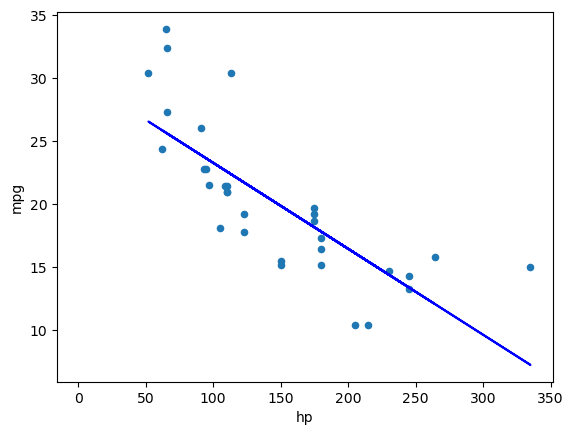

In [30]:
#Enter your code here
cars_df.plot(kind = 'scatter', x = 'hp', y = 'mpg')
plt.plot(X,theta[0]+theta[1]*X, "b")
plt.show()

9.Random choose 3 datapoint from the dataset, use the linear model to predict the MPG with HP, show the difference between predict value and real value. (10)

In [71]:
#Enter your code here
datapoints = cars_df.sample(n=3)
actual_hp_mpg = [(df_index, hp_df, mpg_df) for df_index, hp_df, mpg_df in zip(datapoints.index, datapoints['hp'], datapoints['mpg'])]

model_data = []

i = 1
for datapoint in actual_hp_mpg:
    curr_idx = datapoint[0] # index of datapoint
    obs_hp = datapoint[1] # observed HP
    obs_mpg = datapoint[2] # actual MPG

    pred_mpg = theta[0] + theta[1] * obs_hp # predicted mpg from model
    diff_mpg = abs(pred_mpg - obs_mpg)

    model_data.append({
        "idf_ndex": curr_idx,
        "hp": obs_hp,
        "obs_mpg": obs_mpg,
        "pred_mpg": pred_mpg
    })

    print(f'datapoint {i} at index {curr_idx}:\n\t has an HP of {obs_hp}\n\t the model predicted it has an mpg of {pred_mpg}\n\t the actual mpg is {obs_mpg}')
    print(f'\t the difference between the predicted and actual mpg value is: {diff_mpg}\n')
    i += 1

datapoint 1 at index 18:
	 has an HP of 52
	 the model predicted it has an mpg of 26.550990079901162
	 the actual mpg is 30.4
	 the difference between the predicted and actual mpg value is: 3.849009920098837

datapoint 2 at index 7:
	 has an HP of 62
	 the model predicted it has an mpg of 25.868707299185527
	 the actual mpg is 24.4
	 the difference between the predicted and actual mpg value is: 1.4687072991855281

datapoint 3 at index 29:
	 has an HP of 175
	 the model predicted it has an mpg of 18.158911877098852
	 the actual mpg is 19.7
	 the difference between the predicted and actual mpg value is: 1.5410881229011473



10.Explain the why some differences are large, some are not(10)

**The reason why some difference are large and some are not could be because the model is not a great fit for the data, another reason is that maybe the data contains extreme values and outliers which may impact the accuracy of the model.**

11.Find $\mathrm{R}^{2}$ and use $\mathrm{R}^{2}$ to explain whether the model is accurate.(10)

In [72]:
#Enter your code here
# R^2, the Coefficient of Determination, can be found using the formula: 1 - (SSR/SST)
# where SSR is the sum of residuals squared, and SST is the total sum of squares

# finding SSR:
calc_residual = lambda act_y, pred_y: act_y - pred_y
residuals = [calc_residual(d["obs_mpg"], d["pred_mpg"]) for d in model_data]
SSR = sum([r**2 for r in residuals])

# SST is sum of squared distance the actual value is away from the mean value
mean_y = sum([y["obs_mpg"] for y in model_data])/len(model_data)
sq_dist = lambda act_y: (act_y - mean_y)**2
SST = sum([sq_dist(y["obs_mpg"]) for y in model_data])

R_squared = 1 - (SSR/SST)
R_squared


0.663687604040206

**The R^2 value indicates that roughly 66.37% of the variation in the mpg values can be explained by our model. This model explains most of the variance in the data but could be improved.**